# See Chapter 2, Deep Learning with Python

Let's create a simple machine learning model to show the big picture and then learn the details.

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data Exploration

In [3]:
# what is the shape of train_images and test_images?
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# what is the length of the train labels and test labels?
print(len(train_labels))
print(len(test_labels))

60000
10000


the number of training examples = 60000
the number of classes = 10
Dimention of images = 60000 x 28  
The number of occurances of each class in the dataset = {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}  



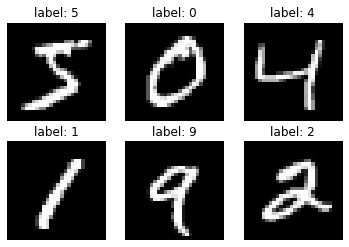

In [5]:
# Plot the images
import matplotlib.pyplot as plt
print("the number of training examples = %i" % train_images.shape[0])
print("the number of classes = %i" % len(np.unique(train_labels)))
print("Dimention of images = {:d} x {:d}  ".format(train_images.shape[0],train_images.shape[1])  )

#This line will allow us to know the number of occurrences of each specific class in the data
unique, count= np.unique(train_labels, return_counts=True)
print("The number of occurances of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

# how many images to display (rows*columns)
rows = 2
columns = 3
for index in range(rows*columns):
    plt.subplot(rows, columns, index + 1)
    plt.imshow(train_images[index], cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('label: ' + str(train_labels[index]))

# What does these values look like? (Nicolas)

label= 5 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 

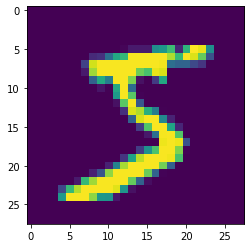

In [39]:
#Experiment with different indices in the array. Replace "[0]" for [89] to take a look to eighty nine index
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print("label= %s " %  train_labels[0])
print(train_images[0])

# Workflow
1. Feed the neural network the training data (train_images, train_labels)
2. The network will learn to associate images and labels
3. Use the test_images to verify if the predictions match the labels from test_labels

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

## Three important concepts
* Loss function- How the network will measure its performance on the training data
* Optimizer- The mechanism through with network will update itself based on the data its been presented and its loss function
* Metrics to monitor during training and testing- in this case we will use accuarcy (the fraction of the images that were correctly classified)

In [7]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [8]:
# shape the data into a form the network accepts
# transorm the data from an array shape (6000, 28, 28) of type unit8 with values [0,255] to
# a float32 array with shape (6000, 28*28) with values between and 1
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [9]:
# categorial encode the lables (explained in detail later)
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
# fit the model
network.fit(train_images,train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2583 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1047 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0677 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0502 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0372 - accuracy: 0.9891


In [11]:
# Run the model on the test data
test_loss,test_acc = network.evaluate(test_images,test_labels)
print('test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9780
test accuracy: 0.9779999852180481


# Questions
1. Why is the accuracy lower on the test data than the training data?
2. Create your own test image of a 4 and an 8 using Microsoft Paint (28,28) pixels and test the images using the model
3. Describe your findings and why the model is accurate or not accurate.


Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

Cambiar la condicion de horse y human para 1,2,3....

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")